In [5]:
import requests
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import datetime
from pandas.io.json import json_normalize #package for flattening json in pandas df


#https://openweathermap.org/appid
#The requests Python module takes care of both retrieving JSON data and decoding it, due to its builtin JSON decoder.
# sebd http reqiest
r = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1733046&APPID=0374af59a0fbc6151ac1176be239e54b')


# What is HTTP?
# HTTP is a set of protocols designed to enable communication between clients and servers. It works as a request-response protocol between a client and server.
# A web browser may be the client, and an application on a computer that hosts a web site may be the server.

# So, to request a response from the server, there are mainly two methods:
# GET : to request data from the server.
    
weather = r.json() # Check the JSON Response Content documentation below
weather


{'cod': '200',
 'message': 0.0087,
 'cnt': 40,
 'list': [{'dt': 1565308800,
   'main': {'temp': 300.36,
    'temp_min': 298.291,
    'temp_max': 300.36,
    'pressure': 1009.19,
    'sea_level': 1009.19,
    'grnd_level': 1007.11,
    'humidity': 82,
    'temp_kf': 2.07},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 64},
   'wind': {'speed': 1.65, 'deg': 123.073},
   'sys': {'pod': 'd'},
   'dt_txt': '2019-08-09 00:00:00'},
  {'dt': 1565319600,
   'main': {'temp': 305.78,
    'temp_min': 304.228,
    'temp_max': 305.78,
    'pressure': 1010.37,
    'sea_level': 1010.37,
    'grnd_level': 1008.29,
    'humidity': 59,
    'temp_kf': 1.55},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 65},
   'wind': {'speed': 3.39, 'deg': 140.032},
   'sys': {'pod': 'd'},
   'dt_txt': '2019-08-09 03:00:00'},
  {'dt': 1565330400,
   'main

In [6]:
weather_df = json_normalize(weather)
weather_df.head(3)

,city.coord.lat,city.coord.lon,city.country,city.id,city.name,city.timezone,cnt,cod,list,message
0,3.1431,101.6865,MY,1733046,Kuala Lumpur,28800,40,200,"[{'dt': 1565308800, 'main': {'temp': 300.36, '...",0.0087


In [7]:
weather_df1 = json_normalize(weather['list'])
weather_df1.head(3)

,clouds.all,dt,dt_txt,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,main.temp_kf,main.temp_max,main.temp_min,rain.3h,sys.pod,weather,wind.deg,wind.speed
0,64,1565308800,2019-08-09 00:00:00,1007.11,82,1009.19,1009.19,300.36,2.07,300.36,298.291,NaN,d,"[{'id': 803, 'main': 'Clouds', 'description': ...",123.073,1.65
1,65,1565319600,2019-08-09 03:00:00,1008.29,59,1010.37,1010.37,305.78,1.55,305.78,304.228,NaN,d,"[{'id': 803, 'main': 'Clouds', 'description': ...",140.032,3.39
2,82,1565330400,2019-08-09 06:00:00,1005.79,55,1007.82,1007.82,306.25,1.04,306.25,305.216,NaN,d,"[{'id': 803, 'main': 'Clouds', 'description': ...",152.051,3.61


In [8]:
weather_df1['dt_txt'] = pd.to_datetime(weather_df1['dt_txt'])

In [9]:
weather_df1['dt_txt1'] = weather_df1['dt_txt'].dt.date

In [10]:
weather_df1.head()

,clouds.all,dt,dt_txt,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,main.temp_kf,main.temp_max,main.temp_min,rain.3h,sys.pod,weather,wind.deg,wind.speed,dt_txt1
0,64,1565308800,2019-08-09 00:00:00,1007.11,82,1009.19,1009.19,300.360,2.07,300.360,298.291,NaN,d,"[{'id': 803, 'main': 'Clouds', 'description': ...",123.073,1.65,2019-08-09
1,65,1565319600,2019-08-09 03:00:00,1008.29,59,1010.37,1010.37,305.780,1.55,305.780,304.228,NaN,d,"[{'id': 803, 'main': 'Clouds', 'description': ...",140.032,3.39,2019-08-09
2,82,1565330400,2019-08-09 06:00:00,1005.79,55,1007.82,1007.82,306.250,1.04,306.250,305.216,NaN,d,"[{'id': 803, 'main': 'Clouds', 'description': ...",152.051,3.61,2019-08-09
3,100,1565341200,2019-08-09 09:00:00,1003.94,66,1005.29,1005.29,302.830,0.52,302.830,302.311,NaN,d,"[{'id': 804, 'main': 'Clouds', 'description': ...",151.460,1.89,2019-08-09
4,98,1565352000,2019-08-09 12:00:00,1004.95,72,1006.80,1006.80,300.311,0.00,300.311,300.311,NaN,n,"[{'id': 804, 'main': 'Clouds', 'description': ...",137.031,1.04,2019-08-09


In [11]:
weather_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
clouds.all         40 non-null int64
dt                 40 non-null int64
dt_txt             40 non-null datetime64[ns]
main.grnd_level    40 non-null float64
main.humidity      40 non-null int64
main.pressure      40 non-null float64
main.sea_level     40 non-null float64
main.temp          40 non-null float64
main.temp_kf       40 non-null float64
main.temp_max      40 non-null float64
main.temp_min      40 non-null float64
rain.3h            8 non-null float64
sys.pod            40 non-null object
weather            40 non-null object
wind.deg           40 non-null float64
wind.speed         40 non-null float64
dt_txt1            40 non-null object
dtypes: datetime64[ns](1), float64(10), int64(3), object(3)
memory usage: 5.4+ KB


In [15]:
weather_stat = weather_df1.groupby(by='dt_txt1' , as_index=False).agg({"wind.speed": "mean", "main.temp": "mean", "main.humidity": "mean"})
weather_stat.rename(columns={"wind.speed": "Average_speed", "main.temp": "Average_temp", "main.humidity": "Average_humidity"}, inplace=True)

# the following procude the same result
# df1 = df.rename({'a': 'X', 'b': 'Y'}, axis=1)  # new method
# df1 = df.rename({'a': 'X', 'b': 'Y'}, axis='columns')
# df1 = df.rename(columns={'a': 'X', 'b': 'Y'})  # old method 

In [19]:
weather_stat


,dt_txt1,Average_speed,Average_temp,Average_humidity
0,2019-08-09,1.68125,301.236750,72.500
1,2019-08-10,2.41375,300.872750,72.250
2,2019-08-11,2.48500,301.759250,68.000
3,2019-08-12,2.52875,301.452625,68.375
4,2019-08-13,2.42375,302.116125,64.000


Text(60,0.5,'Value')

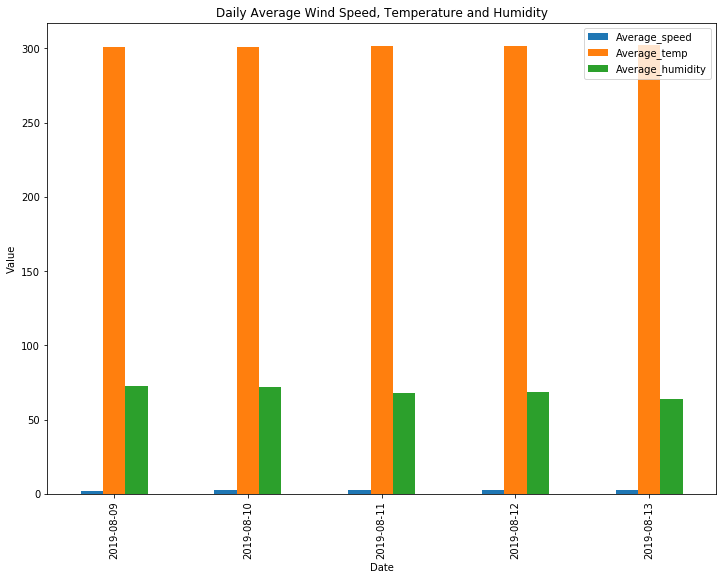

In [22]:

plt.rc('figure', figsize= (10, 8))

ax = weather_stat.plot(x='dt_txt1', y=["Average_speed", "Average_temp", "Average_humidity"], kind="bar", color = ["C0","C1","C2"])

plt.tight_layout()
plt.title("Daily Average Wind Speed, Temperature and Humidity")
plt.xlabel("Date")
plt.ylabel("Value")

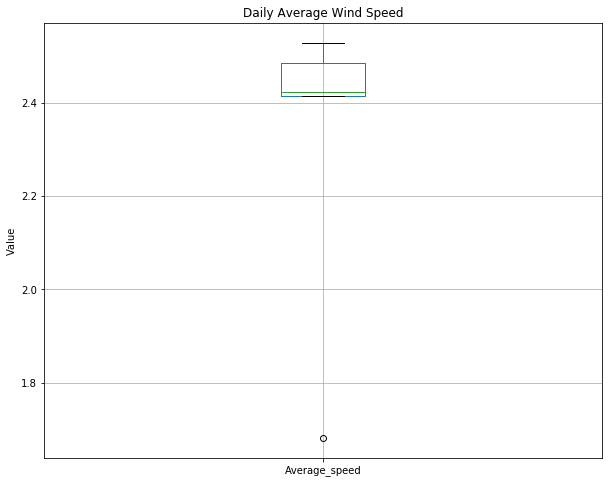

In [24]:
    
weather_stat.boxplot(["Average_speed"])
plt.title("Daily Average Wind Speed")
plt.ylabel("Value")
plt.show()